In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scienceplots

In [2]:
textwidth = 6.49733

plt.style.use('science')
plt.rcParams.update({
    "font.family": "lmodern",   # specify font family here
    "font.size":11})            # specify font size here

In [3]:
L=205               # Box size
bin_number=25       # Number of bins for each feature
N_shufflings=100    # Number of shufflings done

path = 'Corte_10_50/100_shufflings/25_spatial_bins/'
path_resultados = 'Resultados/' + path
path_figuras = 'Figuras/PCF_recalculated/'

In [4]:
def log_func(x, L, k, x0):
    return L/(1 + np.exp(-k * (x - x0))) + 1

def AB_calculator(pcf_org, pcf_mass, sigma_org, sigma_mass):
    '''
    Computes the ratio and uncertainty of said ratio between the 2pcf of a shuffled sample and the halo mass shuffled sample.
    
    Parameters
    ----------
    pcf_org : pandas Series
              Series with shuffled 2pcf calculation.
    pcf_mass: pandas Series
              Series with halo mass - shuffled 2pcf calculation.
    sigma_org : pandas Series
              Series with shuffled 2pcf uncertainty.
    sigma_mass: pandas Series
              Series with halo mass - shuffled 2pcf uncertainty.

    Returns
    -------
    ratio : ratio between the 2PCFs

    sigma : uncertainty of said ratio
    '''

    if len(pcf_org) != len(pcf_mass):
        raise  ValueError('2PCFs of different lengths. Subject length: ', len(pcf_org), ' Mass length: ', len(pcf_mass))

    ratio = pcf_org / pcf_mass
    sigma = np.sqrt( (sigma_org / pcf_mass)**2 + (- ratio * sigma_mass / pcf_mass )**2)
    
    return ratio, sigma

def AB_fit (ratio, sigma, ravg, p0=[0.1, 15, 0.2]):

    parameters, cov = curve_fit(log_func, np.log10(ravg), ratio, p0 = p0,  sigma = sigma, absolute_sigma=True)
    AB = parameters[0]
    sigma_AB = np.sqrt(cov[0,0])
    

    x_fit = np.log10(np.linspace(min(ravg), max(ravg), 1000))
    y_fit = log_func(x_fit, parameters[0], parameters[1], parameters[2])
    
    return AB, sigma_AB, x_fit, y_fit

# Results CSV

In [5]:
mass_cuts = [10.5, 10.75, 13.0]


feature_file_dict = {'Original'           : '.',
                     'Halo concentration' : 'Halo_mass_concentration',
                     'Halo spin'     : 'Halo_mass_spin',
                     'Halo mrank 1'  : 'Halo_mass_mrank1',
                     'Halo mrank 2'  : 'Halo_mass_mrank2',
                     'Halo mrank 3'  : 'Halo_mass_mrank3',
                     'Halo mrank 4'  : 'Halo_mass_mrank4',
                     'Halo mrank 5'  : 'Halo_mass_mrank5',
                     'Halo mrank 6'  : 'Halo_mass_mrank6',
                     'Halo vrank 1'  : 'Halo_mass_vrank1',
                     'Halo vrank 2'  : 'Halo_mass_vrank2',
                     'Halo vrank 3'  : 'Halo_mass_vrank3',
                     'Halo vrank 4'  : 'Halo_mass_vrank4',
                     'Halo vrank 5'  : 'Halo_mass_vrank5',
                     'Halo vrank 6'  : 'Halo_mass_vrank6',
                     'Halo tmform 1' : 'Halo_mass_tmform1',
                     'Halo tmform 2' : 'Halo_mass_tmform2',
                     'Halo tmform 3' : 'Halo_mass_tmform3',
                     'Halo tmform 4' : 'Halo_mass_tmform4',
                     'Halo tmform 5' : 'Halo_mass_tmform5',
                     'Halo tvform 1' : 'Halo_mass_tvform1',
                     'Halo tvform 2' : 'Halo_mass_tvform2',
                     'Halo tvform 3' : 'Halo_mass_tvform3',
                     }

feature_p0_dict   = {'.'                      : [[0.15, 15, 0.2], [0.15, 15, 0.2]],
                    'Halo_mass_concentration' : [[0.05, 18, 0.1], [0.05, 18, 0.1]],
                    'Halo_mass_spin'          : [[0.05, 10, 0.25], [0.05, 10, 0.25]],
                    'Halo_mass_mrank1'        : [[0.15, 15, 0.2], [0.15, 15, 0.2]],
                    'Halo_mass_mrank2'        : [[0.15, 15, 0.2], [0.15, 15, 0.2]],
                    'Halo_mass_mrank3'        : [[0.15, 15, 0.2], [0.15, 15, 0.2]],
                    'Halo_mass_mrank4'        : [[0.15, 15, 0.2], [0.15, 15, 0.2]],
                    'Halo_mass_mrank5'        : [[0.15, 15, 0.2], [0.15, 15, 0.2]],
                    'Halo_mass_mrank6'        : [[0.15, 15, 0.2], [0.15, 15, 0.2]],
                    'Halo_mass_vrank1'        : [[0.15, 15, 0.2], [0.15, 15, 0.2]],
                    'Halo_mass_vrank2'        : [[0.15, 15, 0.2], [0.15, 15, 0.2]],
                    'Halo_mass_vrank3'        : [[0.15, 15, 0.2], [0.15, 15, 0.2]],
                    'Halo_mass_vrank4'        : [[0.15, 15, 0.2], [0.15, 15, 0.2]],
                    'Halo_mass_vrank5'        : [[0.15, 15, 0.2], [0.15, 15, 0.2]],
                    'Halo_mass_vrank6'        : [[0.15, 15, 0.2], [0.15, 15, 0.2]],
                    'Halo_mass_tmform1'       : [[0.15, 15, 0.2], [0.15, 15, 0.2]],
                    'Halo_mass_tmform2'       : [[0.15, 15, 0.2], [0.15, 15, 0.2]],
                    'Halo_mass_tmform3'       : [[0.15, 15, 0.2], [0.15, 15, 0.2]],
                    'Halo_mass_tmform4'       : [[0.15, 15, 0.2], [0.15, 15, 0.2]],
                    'Halo_mass_tmform5'       : [[0.15, 15, 0.2], [0.15, 15, 0.2]],
                    'Halo_mass_tvform1'       : [[0.15, 15, 0.2], [0.15, 15, 0.2]],
                    'Halo_mass_tvform2'       : [[0.06, 15, 0.4], [0.04, 20, 0.5]],
                    'Halo_mass_tvform3'       : [[0.06, 15, 0.3], [0.05, 30, 0.6]],
                    }

label_dict =       {'Original'           : 'Original',
                    'Halo concentration' : r'$C$',
                    'Halo spin'          : r'$\lambda$',
                    'Halo mrank 1'       : 'Mass rank. 1',
                    'Halo mrank 2'       : 'Mass rank. 2',
                    'Halo mrank 3'       : 'Mass rank. 3',
                    'Halo mrank 4'       : 'Mass rank. 4',
                    'Halo mrank 5'       : 'Mass rank. 5',
                    'Halo mrank 6'       : 'Mass rank. 6',
                    'Halo vrank 1'       : 'Velocity rank. 1',
                    'Halo vrank 2'       : 'Velocity rank. 2',
                    'Halo vrank 3'       : 'Velocity rank. 3',
                    'Halo vrank 4'       : 'Velocity rank. 4',
                    'Halo vrank 5'       : 'Velocity rank. 5',
                    'Halo vrank 6'       : 'Velocity rank. 6',
                    'Halo tmform 1'      : r'$t_{f, M, 1}$',
                    'Halo tmform 2'      : r'$t_{f, M, 2}$',
                    'Halo tmform 3'      : r'$t_{f, M, 3}$',
                    'Halo tmform 4'      : r'$t_{f, M, 4}$',
                    'Halo tmform 5'      : r'$t_{f, M, 5}$',
                    'Halo tvform 1'      : r'$t_{f, V, 1}$',
                    'Halo tvform 2'      : r'$t_{f, V, 2}$',
                    'Halo tvform 3'      : r'$t_{f, V, 3}$'
                    }


In [6]:
Y_fit_list_all=[]
Ratio_list_all=[]

for i in range(len(mass_cuts)-1):
    mass_cut_1 = mass_cuts[i]
    mass_cut_2 = mass_cuts[i+1]

    Y_fit_list=[]
    Ratio_list=[]

    ## We read the data for the mass bin
    pcf_mass = pd.read_csv(path_resultados + f'Halo_mass/pcf_shuffled_mean_{mass_cut_1}_{mass_cut_2}.csv')
    pcf_original = pd.read_csv(path_resultados + f'pcf_original_{mass_cut_1}_{mass_cut_2}.csv')
    ravg = pcf_original['ravg']


    names=['Feature', 'Assembly bias', r'$\pm$', r'$\sigma$', 'GAB fraction', 'Mean GAB fraction']
    resultados_df = pd.DataFrame(data=np.zeros([23, 6]), columns=names)
    j=0
    ## We calculate the GAB level
    for feature in feature_file_dict.keys():

        feature_path = feature_file_dict[feature]

        if feature == 'Original':
            pcf = pd.read_csv(path_resultados + f'pcf_original_{mass_cut_1}_{mass_cut_2}.csv')
            ratio, sigma = AB_calculator(pcf['xi'], pcf_mass['mean'], np.zeros(len(pcf['xi'])), pcf_mass['std'])
        else:
            pcf = pd.read_csv(path_resultados + f'{feature_path}/pcf_shuffled_mean_{mass_cut_1}_{mass_cut_2}.csv')
            ratio, sigma = AB_calculator(pcf['mean'], pcf_mass['mean'], pcf['std'], pcf_mass['std'])
        
        p0 = feature_p0_dict[feature_path][i]
        AB, sigma_AB, x_fit, y_fit = AB_fit(ratio, sigma, ravg, p0=p0)

        Y_fit_list.append(y_fit)
        Ratio_list.append(ratio)

        if feature == 'Original':
            AB_original = AB


        resultados_df.loc[j, 'Feature'] = label_dict[feature]
        resultados_df.loc[j, 'Assembly bias'] = np.round(AB, 3)
        resultados_df.loc[j, r'$\pm$'] = str(r'$\pm$')
        resultados_df.loc[j, r'$\sigma$'] = np.round(sigma_AB, 3)
        resultados_df.loc[j, 'GAB fraction'] = np.round(AB / AB_original, 3)

        j+=1

    Y_fit_list_all.append(Y_fit_list)
    Ratio_list_all.append(Ratio_list)

    resultados_df.to_csv(f'Results_bin{i+1}_v3.csv', index=False)

results_bin1 = pd.read_csv('Results_bin1_v3.csv')
results_bin2 = pd.read_csv('Results_bin2_v3.csv')

results_bin1['Mean GAB fraction'] = np.round((results_bin1['GAB fraction'] + results_bin2['GAB fraction']) / 2, 3)
results_bin2['Mean GAB fraction'] = np.round((results_bin1['GAB fraction'] + results_bin2['GAB fraction']) / 2, 3)


results_bin1.to_csv(f'Results_bin1_v3.csv', index=False)
results_bin2.to_csv(f'Results_bin2_v3.csv', index=False)

/var/folders/_z/zylk7tjj7sv4_rg6qwsqx1jr0000gn/T/ipykernel_2224/3972464412.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Original' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  resultados_df.loc[j, 'Feature'] = label_dict[feature]
/var/folders/_z/zylk7tjj7sv4_rg6qwsqx1jr0000gn/T/ipykernel_2224/3972464412.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '$\pm$' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  resultados_df.loc[j, r'$\pm$'] = str(r'$\pm$')
/var/folders/_z/zylk7tjj7sv4_rg6qwsqx1jr0000gn/T/ipykernel_2224/3972464412.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Original' has dtype incompatible with float64, please explicitly ca

# Plots

In [14]:
def plot_AB(mass_bin, plot_features, save=None, scale=1, horizontal=False):

    mass_dict = {'1' : [[10.50, 10.75], 0],
                 '2' : [[10.75, 13.00], 1]}
    
    mass_bin = str(mass_bin)
    
    variable_dict = {'Halo concentration' : [Ratio_list_all[mass_dict[mass_bin][1]][1], Y_fit_list_all[mass_dict[mass_bin][1]][1], r'$C$'],
                     'Halo spin'          : [Ratio_list_all[mass_dict[mass_bin][1]][2], Y_fit_list_all[mass_dict[mass_bin][1]][2], r'$\lambda$'],
                     'Halo mrank 1'       : [Ratio_list_all[mass_dict[mass_bin][1]][3], Y_fit_list_all[mass_dict[mass_bin][1]][3], r'$M_{\rm peak}$ ranking 1'],
                     'Halo mrank 2'       : [Ratio_list_all[mass_dict[mass_bin][1]][4], Y_fit_list_all[mass_dict[mass_bin][1]][4], r'$M_{\rm peak}$ ranking 2'],
                     'Halo mrank 3'       : [Ratio_list_all[mass_dict[mass_bin][1]][5], Y_fit_list_all[mass_dict[mass_bin][1]][5], r'$M_{\rm peak}$ ranking 3'],
                     'Halo mrank 4'       : [Ratio_list_all[mass_dict[mass_bin][1]][6], Y_fit_list_all[mass_dict[mass_bin][1]][6], r'$M_{\rm peak}$ ranking 4'],
                     'Halo mrank 5'       : [Ratio_list_all[mass_dict[mass_bin][1]][7], Y_fit_list_all[mass_dict[mass_bin][1]][7], r'$M_{\rm peak}$ ranking 5'],
                     'Halo mrank 6'       : [Ratio_list_all[mass_dict[mass_bin][1]][8], Y_fit_list_all[mass_dict[mass_bin][1]][8], r'$M_{\rm peak}$ ranking 6'],
                     'Halo vrank 1'       : [Ratio_list_all[mass_dict[mass_bin][1]][9], Y_fit_list_all[mass_dict[mass_bin][1]][9], r'$V_{\rm peak}$ ranking 1'],
                     'Halo vrank 2'       : [Ratio_list_all[mass_dict[mass_bin][1]][10], Y_fit_list_all[mass_dict[mass_bin][1]][10], r'$V_{\rm peak}$ ranking 2'],
                     'Halo vrank 3'       : [Ratio_list_all[mass_dict[mass_bin][1]][11], Y_fit_list_all[mass_dict[mass_bin][1]][11], r'$V_{\rm peak}$ ranking 3'],
                     'Halo vrank 4'       : [Ratio_list_all[mass_dict[mass_bin][1]][12], Y_fit_list_all[mass_dict[mass_bin][1]][12], r'$V_{\rm peak}$ ranking 4'],
                     'Halo vrank 5'       : [Ratio_list_all[mass_dict[mass_bin][1]][13], Y_fit_list_all[mass_dict[mass_bin][1]][13], r'$V_{\rm peak}$ ranking 5'],
                     'Halo vrank 6'       : [Ratio_list_all[mass_dict[mass_bin][1]][14], Y_fit_list_all[mass_dict[mass_bin][1]][14], r'$V_{\rm peak}$ ranking 6'],
                     'Halo tmform 1'      : [Ratio_list_all[mass_dict[mass_bin][1]][15], Y_fit_list_all[mass_dict[mass_bin][1]][15], r'$t_{f, M, 1}$'],
                     'Halo tmform 2'      : [Ratio_list_all[mass_dict[mass_bin][1]][16], Y_fit_list_all[mass_dict[mass_bin][1]][16], r'$t_{f, M, 2}$'],
                     'Halo tmform 3'      : [Ratio_list_all[mass_dict[mass_bin][1]][17], Y_fit_list_all[mass_dict[mass_bin][1]][17], r'$t_{f, M, 3}$'],
                     'Halo tmform 4'      : [Ratio_list_all[mass_dict[mass_bin][1]][18], Y_fit_list_all[mass_dict[mass_bin][1]][18], r'$t_{f, M, 4}$'],
                     'Halo tmform 5'      : [Ratio_list_all[mass_dict[mass_bin][1]][19], Y_fit_list_all[mass_dict[mass_bin][1]][19], r'$t_{f, M, 5}$'],
                     'Halo tvform 1'      : [Ratio_list_all[mass_dict[mass_bin][1]][20], Y_fit_list_all[mass_dict[mass_bin][1]][20], r'$t_{f, V, 1}$'],
                     'Halo tvform 2'      : [Ratio_list_all[mass_dict[mass_bin][1]][21], Y_fit_list_all[mass_dict[mass_bin][1]][21], r'$t_{f, V, 2}$'],
                     'Halo tvform 3'      : [Ratio_list_all[mass_dict[mass_bin][1]][22], Y_fit_list_all[mass_dict[mass_bin][1]][22], r'$t_{f, V, 3}$'],
                     }

    

    mass_cuts = mass_dict[mass_bin][0]

    mass_cut_1 = mass_cuts[0]
    mass_cut_2 = mass_cuts[1]

    fig, ax = plt.subplots(1, 1, figsize=(scale*textwidth*0.95, scale*textwidth*0.9))

    # Halo mass
    ax.plot(np.log10(ravg), (Ratio_list_all[mass_dict[mass_bin][1]][0]), label= 'Original Sample', linestyle='-', marker='+', color='C0')
    ax.plot(x_fit, Y_fit_list_all[mass_dict[mass_bin][1]][0], label= 'Original fit', linestyle='--', marker='', color='C0')


    labels=['Original Sample']
    for i in range(len(plot_features)):
        ratio, y_fit, label = variable_dict[plot_features[i]]
        labels.append(label)
        
        ax.plot(np.log10(ravg), (ratio), label= label, linestyle='-', marker='+', color='C'+str(i+2))
        ax.plot(x_fit, y_fit, label= label+' fit', linestyle='--', marker='', color='C'+str(i+2))


    plot_type=['Data', 'Model']
    lines = ax.get_lines()
    legend1 = plt.legend([lines[i] for i in [0,1]], plot_type, loc='upper right') # Linestyles
    legend2 = plt.legend([lines[i] for i in np.arange(0, len(lines), 2)], labels, loc='upper left') # Colores
    ax.add_artist(legend1)
    ax.add_artist(legend2)

    # Reference lines
    ax.vlines(np.log10(L*0.1), -0.5, 2.5, linestyle='--', color='C1')
    ax.hlines(1, -(10), (100), linestyle='--', color='C1')

    if horizontal:
        for i in range(len(plot_features)):
            _, _, label = variable_dict[plot_features[i]]
            print(label)
            
            if mass_bin == '1':
                print(1 + (results_bin1[results_bin1['Feature'] == label]['Mean GAB fraction 10-20'])*results_bin1.iloc[0, 1])
                ax.hlines(1 + (results_bin1[results_bin1['Feature'] == label]['Mean GAB fraction 10-20'])*results_bin1.iloc[0, 1], -10, 100, linestyle=':', color='C'+str(i+2))
            elif mass_bin == '2':
                print(1 + (results_bin2[results_bin2['Feature'] == label]['Mean GAB fraction 10-20'])*results_bin2.iloc[0, 1])
                ax.hlines(1 + (results_bin2[results_bin2['Feature'] == label]['Mean GAB fraction 10-20'])*results_bin2.iloc[0, 1], -10, 100, linestyle=':', color='C'+str(i+2))

    # Plot formating
    ax.set_xlabel(r'Spatial scale $\log_{10}$ ([Mpc/h])')
    ax.set_ylabel(r'$\xi$ / $\xi_{\rm M_{H}}$')
    # ax.set_title(f'2PCF ratio ({N_shufflings} shufflings, stellar mass bin: {mass_cut_1}-{mass_cut_2})')

    ax.set_ylim([0.9, 1.3])
    ax.set_xlim([-0.5, np.log10((max(pcf_original['ravg'])))])
    
    

    if save != None:
        
        save_file = save

        plt.savefig(path_figuras+f'/PDF/'+save_file+f'{mass_cut_1}_{mass_cut_2}.pdf', bbox_inches='tight')
        plt.savefig(path_figuras+f'/'+save_file+f'{mass_cut_1}_{mass_cut_2}.png', bbox_inches='tight')

    return fig, ax

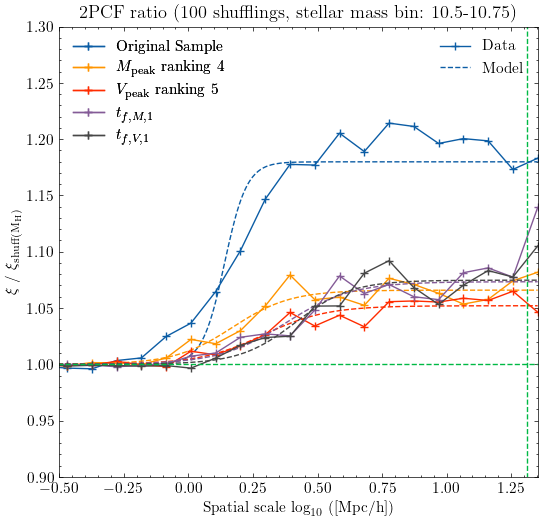

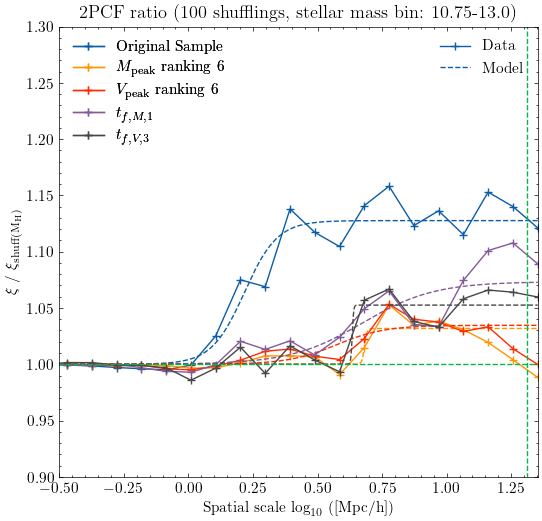

In [18]:
# Best results plot
plot_AB(1, ['Halo mrank 4', 'Halo vrank 5', 'Halo tmform 1', 'Halo tvform 1'], scale=0.65, save='best_fit_')
plot_AB(2, ['Halo mrank 6', 'Halo vrank 6', 'Halo tmform 1', 'Halo tvform 3'], scale=0.65, save='best_fit_')
plt.show()

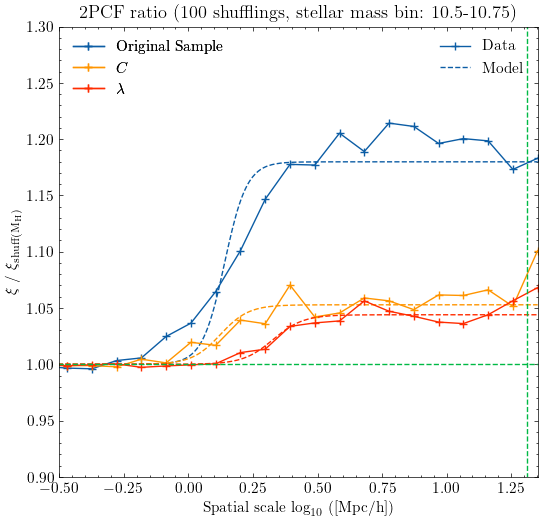

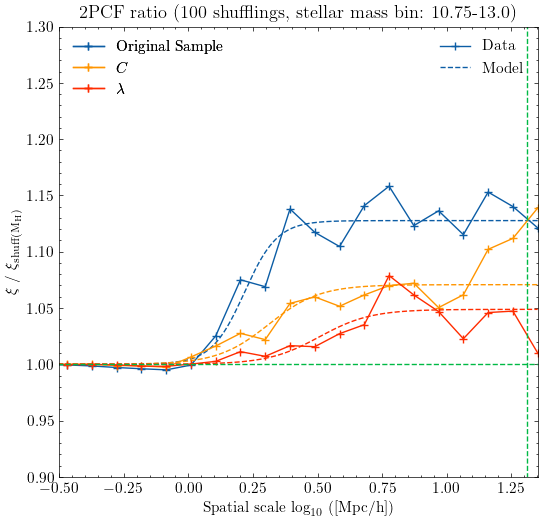

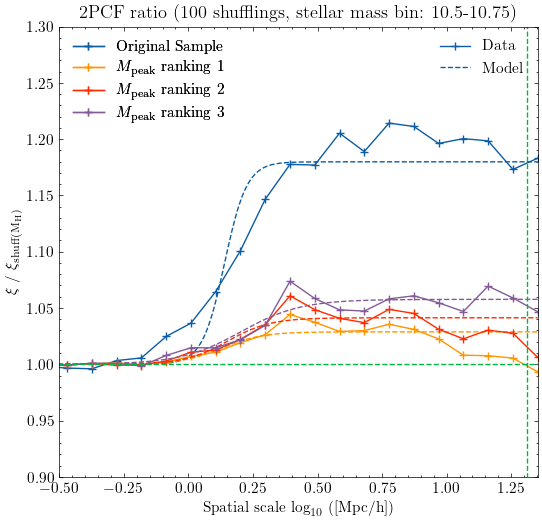

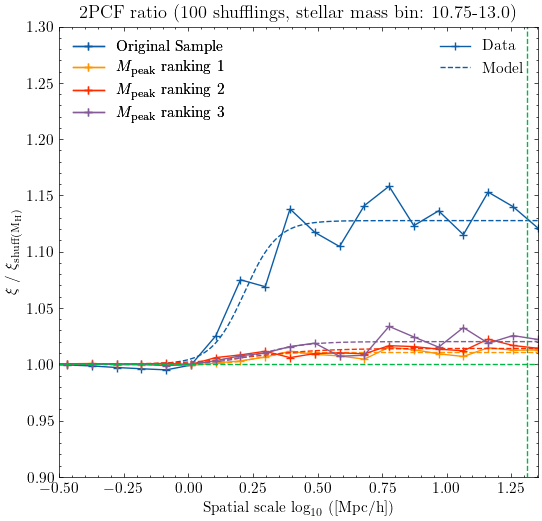

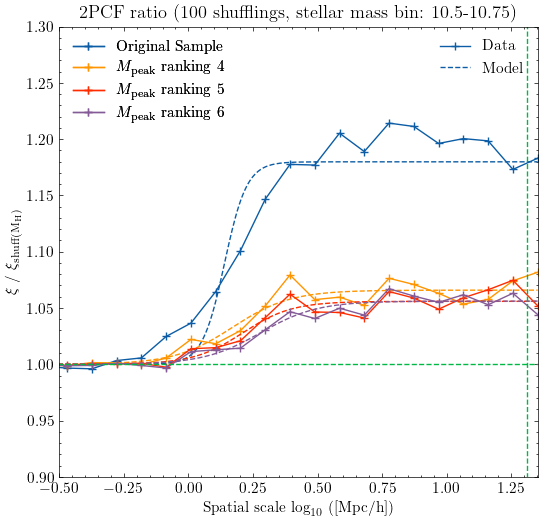

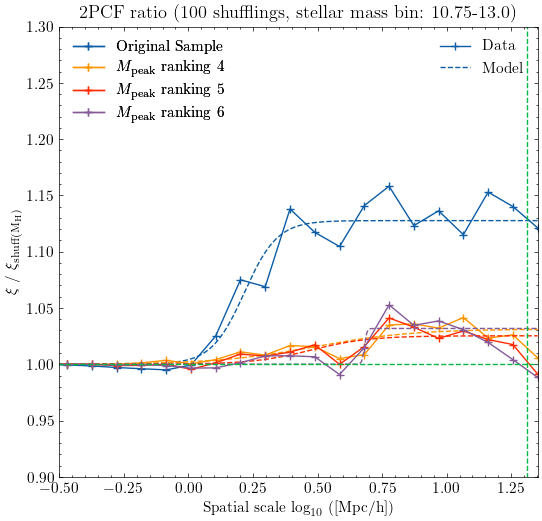

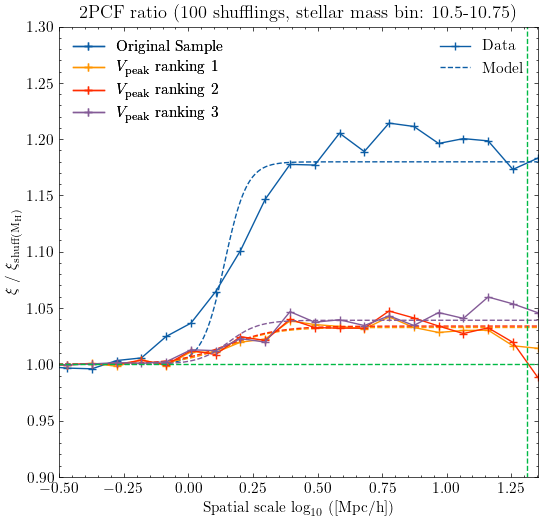

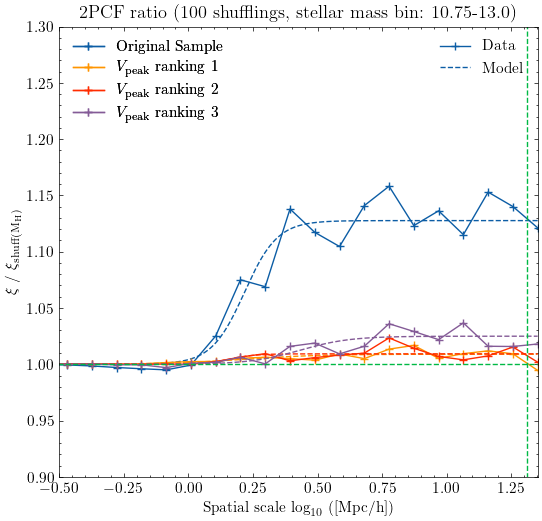

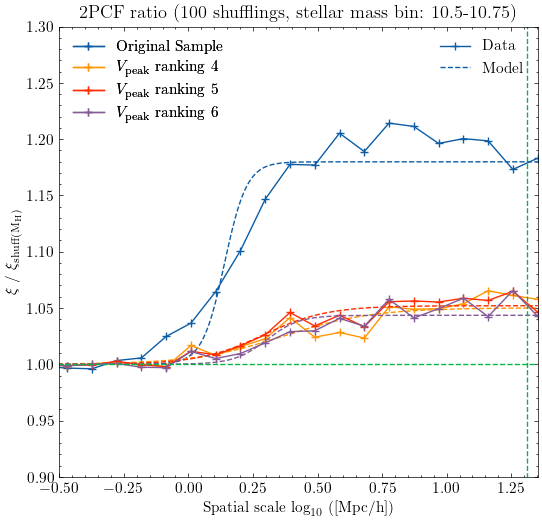

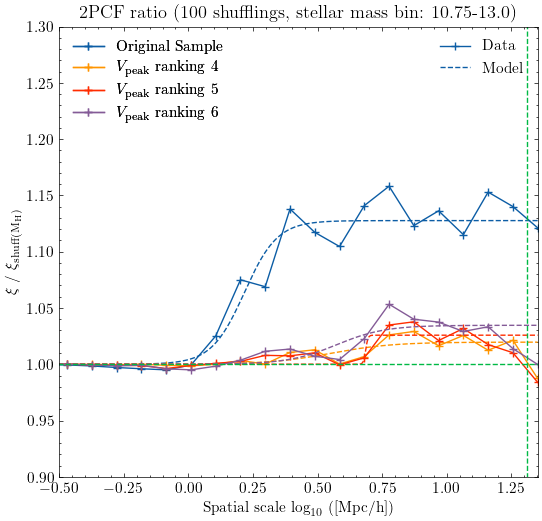

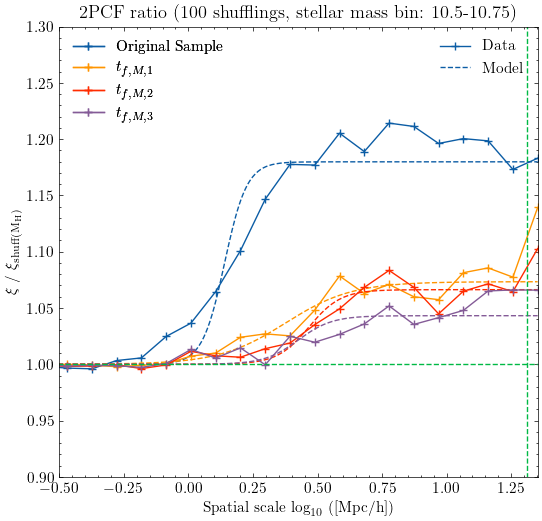

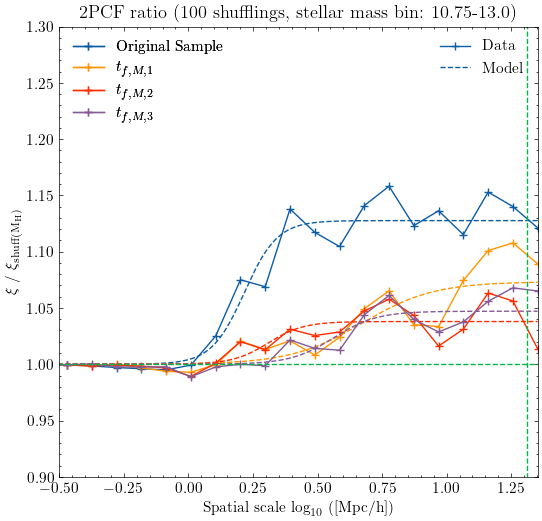

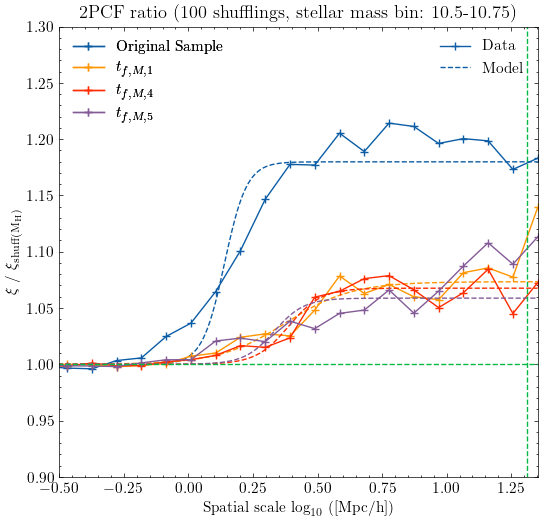

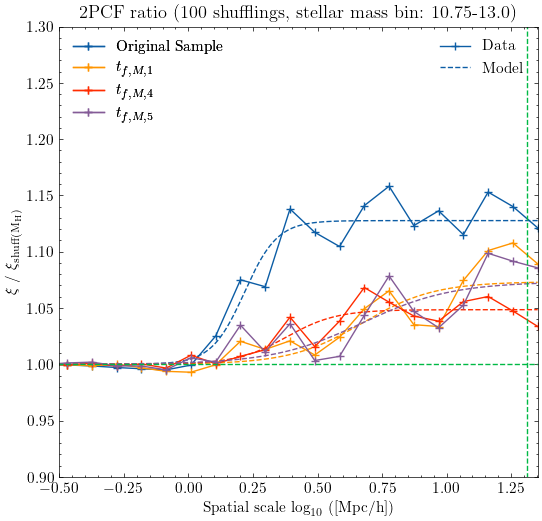

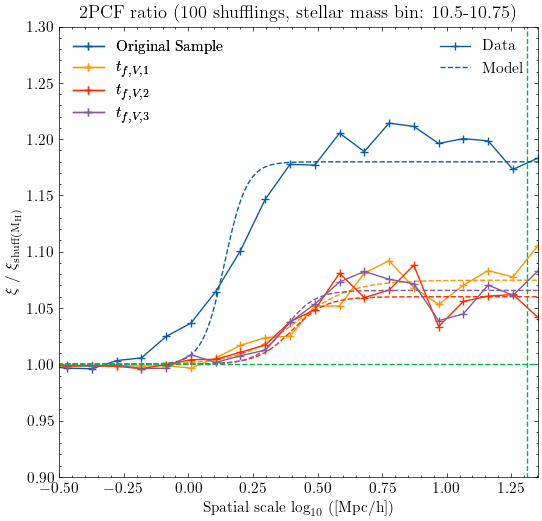

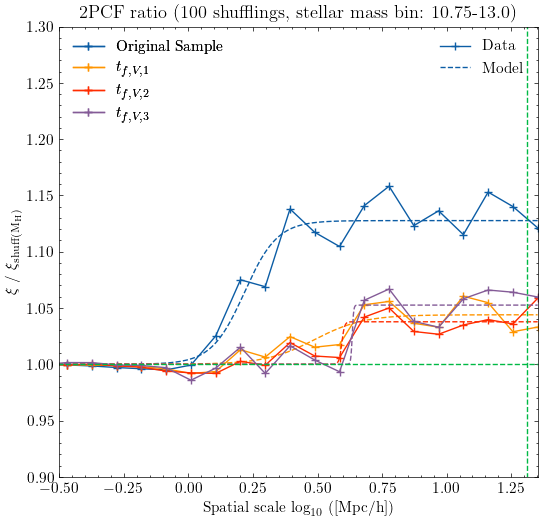

In [16]:
# Rest of the plots
plot_AB(1, ['Halo concentration', 'Halo spin'], save='Mass_concentration_spin_Fit_', scale=0.7)
plot_AB(2, ['Halo concentration', 'Halo spin'], save='Mass_concentration_spin_Fit_', scale=0.7)

plot_AB(1, ['Halo mrank 1', 'Halo mrank 2', 'Halo mrank 3'], save='mrank_123_Fit_', scale=0.7)
plot_AB(2, ['Halo mrank 1', 'Halo mrank 2', 'Halo mrank 3'], save='mrank_123_Fit_', scale=0.7)

plot_AB(1, ['Halo mrank 4', 'Halo mrank 5', 'Halo mrank 6'], save='mrank_456_Fit_', scale=0.7)
plot_AB(2, ['Halo mrank 4', 'Halo mrank 5', 'Halo mrank 6'], save='mrank_456_Fit_', scale=0.7)

plot_AB(1, ['Halo vrank 1', 'Halo vrank 2', 'Halo vrank 3'], save='vrank_123_Fit_', scale=0.7)
plot_AB(2, ['Halo vrank 1', 'Halo vrank 2', 'Halo vrank 3'], save='vrank_123_Fit_', scale=0.7)

plot_AB(1, ['Halo vrank 4', 'Halo vrank 5', 'Halo vrank 6'], save='vrank_456_Fit_', scale=0.7)
plot_AB(2, ['Halo vrank 4', 'Halo vrank 5', 'Halo vrank 6'], save='vrank_456_Fit_', scale=0.7)

plot_AB(1, ['Halo tmform 1', 'Halo tmform 2', 'Halo tmform 3'], save='tmform_123_Fit_', scale=0.7)
plot_AB(2, ['Halo tmform 1', 'Halo tmform 2', 'Halo tmform 3'], save='tmform_123_Fit_', scale=0.7)

plot_AB(1, ['Halo tmform 1', 'Halo tmform 4', 'Halo tmform 5'], save='tmform_145_Fit_', scale=0.7)
plot_AB(2, ['Halo tmform 1', 'Halo tmform 4', 'Halo tmform 5'], save='tmform_145_Fit_', scale=0.7)

plot_AB(1, ['Halo tvform 1', 'Halo tvform 2', 'Halo tvform 3'], save='tvform_123_Fit_', scale=0.7)
plot_AB(2, ['Halo tvform 1', 'Halo tvform 2', 'Halo tvform 3'], save='tvform_123_Fit_', scale=0.7)
plt.show()